In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import pandas as pd

In [34]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [36]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [37]:
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [38]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [39]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [41]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [43]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [45]:
session

In [46]:
# Get a list of column names and types
#columns = inspector.get_columns('na')
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [47]:
# Get a list of column names and types
#columns = inspector.get_columns('na')
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [48]:
## cross multiplication of 2 tables and filtering
## peprformance overhead sql optimize rdbms obdms sql alchemy

same_station = session.query(Measurement,Station).filter(Measurement.prcp == Station.station).limit(10).all()


for record in same_station:
    (measurement, station) = record
    #print(ea.sporder)
    #print(na.sporder)
    print(measurement.station, Station.station)

In [49]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [50]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [51]:
session.query(Measurement.date).\
    filter(Measurement.date > '2011-03-01').\
    order_by(Measurement.date).all()

[('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-02'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-03'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-05'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-06'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-07'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-08'),
 ('2011-03-09'),
 ('2011-03-09'),
 ('2011-03-09'),
 ('2011-03-09'

# Exploratory Climate Analysis

#### Basic Calculations for plotting
#### Calculationg the precipitaiton for the last 12 months 
#### Finding the last data point for getting 1 year

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
month_presp= session.query(Measurement.date).order_by(Measurement.id.desc()).first()
print(month_presp)


# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= last_year).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
presp_df = pd.DataFrame(rain)
presp_df.head()
# Sort the dataframe by date
presp_df.set_index("date").head()

# Use Pandas Plotting with Matplotlib to plot the data


('2017-08-23',)
2016-08-23


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [53]:
# Save the query results as a Pandas DataFrame and set the index to the date column
presp_df = pd.DataFrame(rain)
presp_df.head()
# Sort the dataframe by date
presp_df.set_index("date").head()


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


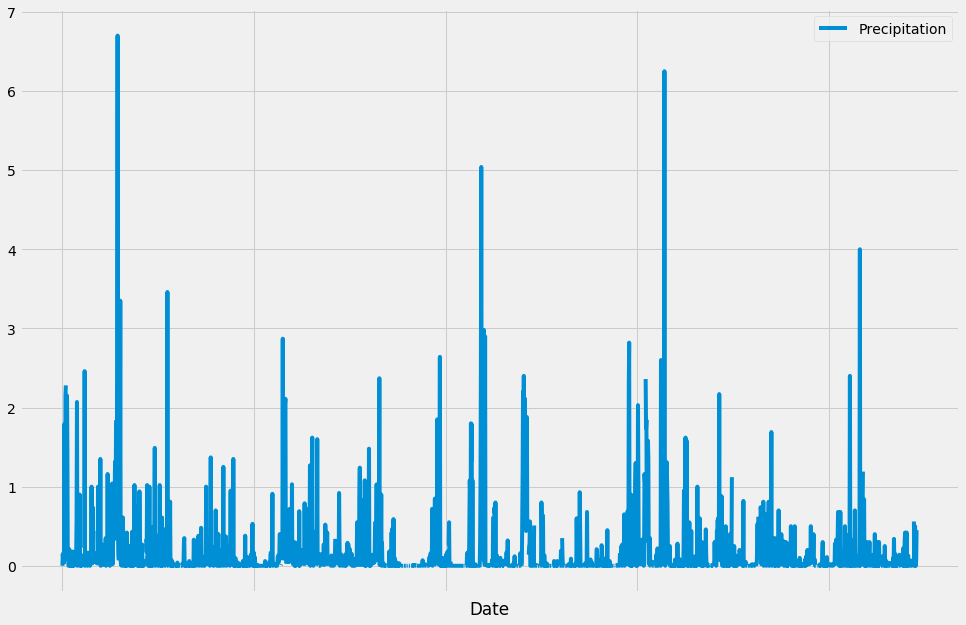

In [55]:
# Use Pandas Plotting with Matplotlib to plot the data
presp_df.plot("date", "prcp")
plt.xlabel("Date")
plt.legend(["Precipitation"])
plt.rcParams["figure.figsize"] = (15,8)
plt.show()



![precipitation](Images/precipitation.png)

In [77]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [56]:
presp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [57]:
# Design a query to show how many stations are available in this dataset?
num_locations = session.query(Measurement).group_by(Measurement.station).count()
num_locations

9

In [58]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
list_st= session.query(Measurement.tobs).order_by(Measurement.tobs.desc()).first()
print(list_st)

(87.0,)


In [59]:

active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
   order_by(func.count(Measurement.tobs).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
best_station = active_station[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
   filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [61]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogr
hitemp_obsrv= session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.station  == 'USC00519281').\
filter(Measurement.date > last_year).all()

In [62]:
hitemp_obsrv


[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [63]:
tobs_df = pd.DataFrame(hitemp_obsrv)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


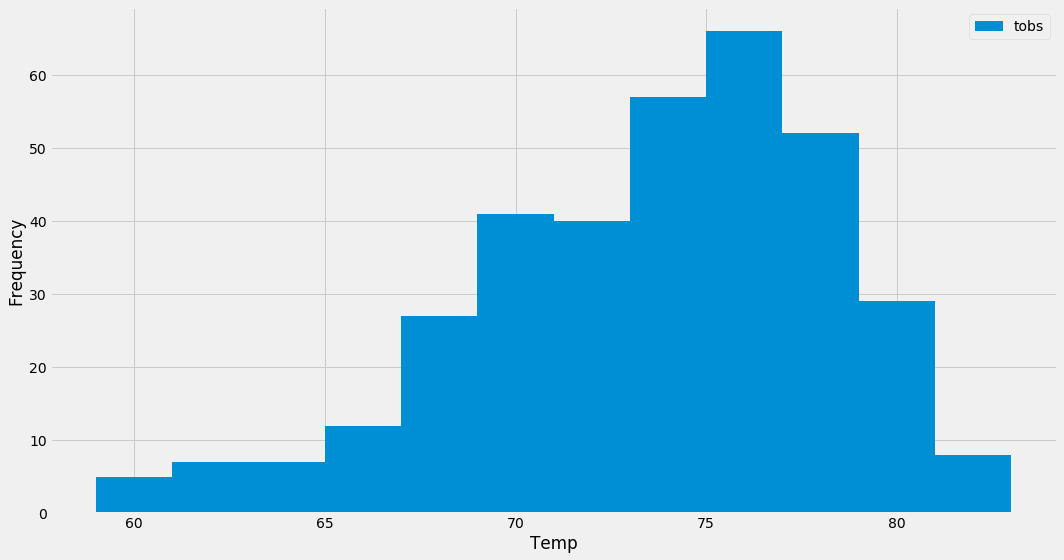

In [64]:
plt.hist(tobs_df['tobs'],12)
plt.xlabel('Temp')
#plt.hist(tobs_df, bins=20)
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.tight_layout()

![precipitation](Images/station-histogram.png)

In [87]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [88]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 

def daily_normals(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date == start_date).filter(Measurement.date == end_date).all()
# function usage example
print(daily_normals('01','01'))
# for your trip using the previous year's data for those same dates.


[(None, None, None)]


In [89]:
def daily_normals(date):
    """Daily Normals. 
    Args: date (str): A date string in the format '%m-%d' 
    Returns: A list of tuples containing the daily normals, tmin, tavg, and tmax
    """

    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
# function usage example
print(daily_normals("01-01"))

[(62.0, 69.15384615384616, 77.0)]


In [90]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [91]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [92]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [93]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [94]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
